In [48]:
import sys
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
from lib import *

%matplotlib qt

RUN=26
EV=0
RAW=True

path="/media/rodrigoa/DiscoDuro/SBND_XA_PDE/APSAIA_VIS/joython/"
Runs=open_runs_table("../macros/APSAIA_VIS.xlsx")
RunProps=Runs[Runs["Run"]==RUN].iloc[0]
Nchans=len(RunProps["Channels"])

run_path=path+"run"+str(RunProps["Run"]).zfill(2)+"/";
compress=False

# One channel at a time: 
i=0;
for ch in RunProps["Channels"]:
    ADC=open_run_var(run_path,"RawADC",[ch],compressed=compress)
    
    Pedestal_vars=do_run_things(ADC,compute_Pedestal_slidingWindows)

    del Pedestal_vars, ADC
    i+=1;



----------
Doing:  compute_Pedestal_slidingWindows  on channel: 0
----------
Doing:  compute_Pedestal_slidingWindows  on channel: 1
----------
Doing:  compute_Pedestal_slidingWindows  on channel: 3
----------
Doing:  compute_Pedestal_slidingWindows  on channel: 4
----------
Doing:  compute_Pedestal_slidingWindows  on channel: 5


In [38]:

def compute_Pedestal_slidingWindows(ADC,ped_lim=400,sliding=50,pretrigger=800):
    """Taking the best between different windows in pretrigger"""
    pedestal_vars=dict();
    slides=int((pretrigger-ped_lim)/sliding);
    N_wvfs=ADC.shape[0];
    aux=np.zeros((N_wvfs,slides))
    for i in range(slides):
        aux[:,i]=np.std (ADC[:,(i*sliding):(i*sliding+ped_lim)],axis=1)

    #put first in the wvf the appropiate window, the one with less std:
    shifts= np.argmin (aux,axis=1)*(-1)*sliding
    ADC_s = shift_ADCs(ADC,shifts)
    
    #compute variables again, now with the best window available
    slided_ped=compute_Pedestal(ADC_s,ped_lim)
    return slided_ped;

ped=compute_Pedestal_slidingWindows(ADC[5])

# # for i in range(8):
# plt.hist(np.min(a,axis=1),400,[0,20]);
# plt.hist(b["STD"],400,[0,20]);

# plt.hist(np.max(x,axis=1),400,[0,20])
# plt.hist(x[:,0],400,[0,20])
# plt.semilogy()
# # np.argmin(x,axis=1)
# x

## Shit

In [ ]:
from lib import *

%matplotlib inline

In [ ]:
path="/media/rodrigoa/DiscoDuro/SBND_XA_PDE/APSAIA_VUV/joython/"

for run in range(1):
    Run_props=open_run_properties(run,"macros/APSAIA_VUV.xlsx")
    run_path=path+"run"+str(run).zfill(2)+"/";

    compress=False
    Peak_vars=open_run_var(run_path,"Peak_vars"    ,Run_props["Channels"],compressed=compress)
    Charge_vars=open_run_var(run_path,"Charge_vars",Run_props["Channels"],compressed=compress)
    Pedestal_vars=open_run_var(run_path,"Pedestal_vars",Run_props["Channels"],compressed=compress)



0         True
1         True
2         True
3         True
4         True
         ...  
20428     True
20429     True
20430     True
20431     True
20432    False
Length: 20433, dtype: bool

(0.0, 1000.0)

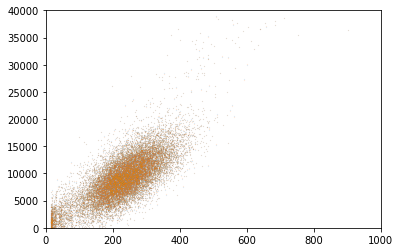

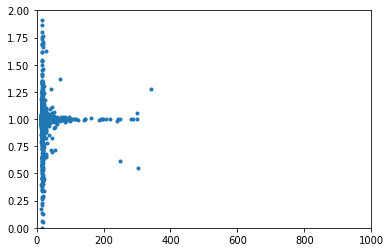

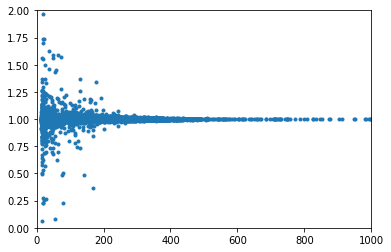

In [ ]:
df = VARsAsDataFrame((Peak_vars,Charge_vars,Pedestal_vars))

PEAK_CUT=(df["PeakTime"]>900)*(df["PeakTime"]<1100)
PEAK_CUT=PEAK_CUT.all(axis=1)

df_y=df[PEAK_CUT]
df_n=df[~PEAK_CUT]

for ch in [0]:
    plt.plot(df_y["Peak"][ch],df_y["ChargeRange"][ch],'.',markersize=0.1)
    plt.plot(df_y["Peak"][ch],df_y["ChargePeakRange"][ch],'.',markersize=0.1)
plt.xlim([0,1000])
plt.ylim([0,40000])

plt.figure()
plt.plot(df_n["Peak"][ch],df_n["ChargePeakRange"][ch]/df_n["ChargeRange"][ch],'.')
plt.ylim(0,2)
plt.xlim([0,1000])
plt.figure()
plt.plot(df_y["Peak"][ch],df_y["ChargePeakRange"][ch]/df_y["ChargeRange"][ch],'.')
plt.ylim(0,2)
plt.xlim([0,1000])